# BAX 443 | Analytical Decision Making | HW2 | Portfolio Optimization

Pallavi Sama

Analytical Decision Making, MSBA, UC Davis

June 3rd, 2018

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-A:-Portfolio-Optimization-based-on-the-Full-Data-Set" data-toc-modified-id="Part-A:-Portfolio-Optimization-based-on-the-Full-Data-Set-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part A: Portfolio Optimization based on the Full Data Set</a></span><ul class="toc-item"><li><span><a href="#Preparing-the-data" data-toc-modified-id="Preparing-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preparing the data</a></span></li><li><span><a href="#Portfolio-Optimization:-Minimizing-Risk" data-toc-modified-id="Portfolio-Optimization:-Minimizing-Risk-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Portfolio Optimization: Minimizing Risk</a></span></li><li><span><a href="#Portfolio-Optimization:-Maximizing-Returns-(or-Utility)" data-toc-modified-id="Portfolio-Optimization:-Maximizing-Returns-(or-Utility)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Portfolio Optimization: Maximizing Returns (or Utility)</a></span></li><li><span><a href="#Simulations" data-toc-modified-id="Simulations-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Simulations</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Recommendations</a></span></li></ul></li><li><span><a href="#Part-B:-Portfolio-Optimization-based-on-the-last-400-trading-days." data-toc-modified-id="Part-B:-Portfolio-Optimization-based-on-the-last-400-trading-days.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part B: Portfolio Optimization based on the last 400 trading days.</a></span><ul class="toc-item"><li><span><a href="#Preparing-the-data" data-toc-modified-id="Preparing-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Preparing the data</a></span></li><li><span><a href="#Portfolio-Optimization:-Minimizing-Risk" data-toc-modified-id="Portfolio-Optimization:-Minimizing-Risk-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Portfolio Optimization: Minimizing Risk</a></span></li><li><span><a href="#Portfolio-Optimization:-Maximizing-Returns-(or-Utility)" data-toc-modified-id="Portfolio-Optimization:-Maximizing-Returns-(or-Utility)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Portfolio Optimization: Maximizing Returns (or Utility)</a></span></li><li><span><a href="#Simulations" data-toc-modified-id="Simulations-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Simulations</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Recommendations</a></span></li></ul></li></ul></div>

### Part A: Portfolio Optimization based on the Full Data Set

The objective is to consider different approaches with respect to portfolio optimization. Input data has trading information about 6 stocks. Based on the evolution of these stocks, recommend different portfolio allocations.

#### Preparing the data

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import math
from scipy import stats
import cvxpy as cvx
from numpy import matrix 
from cvxpy import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
# Read the data
df = pd.read_excel("datahomework2.xls")
df.head()

,Amazon,Apple,Ebay,Facebook,Google,Twitter
0,252.585,106.250000,23.457600,77.190002,519.500000,36.380001
1,245.488,106.260002,23.156700,76.150002,506.600006,37.279999
2,253.816,107.750000,23.116699,76.150002,505.200012,39.090000
3,256.030,111.889999,23.741699,78.175003,506.899994,40.169998
4,253.299,112.010002,23.413401,77.739998,500.700012,39.369999


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 6 columns):
Amazon      799 non-null float64
Apple       799 non-null float64
Ebay        799 non-null float64
Facebook    799 non-null float64
Google      799 non-null float64
Twitter     799 non-null float64
dtypes: float64(6)
memory usage: 37.5 KB


**Based on the data set, compute the rate of returns for each stock**

In [37]:
# calculating the return rates using shift to lag on observations
df['Amazon_rr'] = (df.Amazon-df.Amazon.shift(1))/df.Amazon.shift(1)
df['Apple_rr'] = (df.Apple-df.Apple.shift(1))/df.Apple.shift(1)
df['Ebay_rr'] = (df.Ebay-df.Ebay.shift(1))/df.Ebay.shift(1)
df['Facebook_rr'] = (df.Facebook-df.Facebook.shift(1))/df.Facebook.shift(1)
df['Google_rr'] = (df.Google-df.Google.shift(1))/df.Google.shift(1)
df['Twitter_rr'] = (df.Twitter-df.Twitter.shift(1))/df.Twitter.shift(1)
df.head()

,Amazon,Apple,Ebay,Facebook,Google,Twitter,Amazon_rr,Apple_rr,Ebay_rr,Facebook_rr,Google_rr,Twitter_rr
0,252.585,106.250000,23.457600,77.190002,519.500000,36.380001,NaN,NaN,NaN,NaN,NaN,NaN
1,245.488,106.260002,23.156700,76.150002,506.600006,37.279999,-0.028097,0.000094,-0.012827,-0.013473,-0.024832,0.024739
2,253.816,107.750000,23.116699,76.150002,505.200012,39.090000,0.033924,0.014022,-0.001727,0.000000,-0.002764,0.048552
3,256.030,111.889999,23.741699,78.175003,506.899994,40.169998,0.008723,0.038422,0.027037,0.026592,0.003365,0.027628
4,253.299,112.010002,23.413401,77.739998,500.700012,39.369999,-0.010667,0.001073,-0.013828,-0.005565,-0.012231,-0.019915


** Based on the data set, compute the average returns that will be used for the optimization **

In [5]:
# Using in-built geometric mean
mu = stats.gmean(1+df.loc[1:,['Amazon_rr','Apple_rr','Ebay_rr','Facebook_rr','Google_rr','Twitter_rr']])-1
mu

array([ 1.98778605e-03,  6.25712685e-04,  7.54726158e-04,  1.08819147e-03,
        9.73603071e-04, -2.78636077e-05])

** Based on the data set, compute the variance-covariance matrix of the stock returns **

In [6]:
# Using in-built covariance
Cov = matrix((df.loc[1:,['Amazon_rr','Apple_rr','Ebay_rr','Facebook_rr','Google_rr','Twitter_rr']]).cov())
Cov

matrix([[ 4.07197383e-04,  4.60871516e-06,  1.22772826e-05,
         -1.05667569e-05,  6.56723220e-06, -9.50143600e-05],
        [ 4.60871516e-06,  2.10803738e-04,  5.99369392e-05,
          6.94486102e-05,  6.00972703e-05,  4.03675884e-05],
        [ 1.22772826e-05,  5.99369392e-05,  2.92036867e-04,
          2.71083410e-05,  5.45848998e-05,  2.43589545e-05],
        [-1.05667569e-05,  6.94486102e-05,  2.71083410e-05,
          2.42364043e-04,  9.89613223e-05,  2.19275123e-05],
        [ 6.56723220e-06,  6.00972703e-05,  5.45848998e-05,
          9.89613223e-05,  2.02842223e-04,  9.65658924e-06],
        [-9.50143600e-05,  4.03675884e-05,  2.43589545e-05,
          2.19275123e-05,  9.65658924e-06,  1.07122641e-03]])

#### Portfolio Optimization: Minimizing Risk

Let the portfolio allocation be \begin{align} x = {x_{1},x_{2},x_{3},x_{4},x_{5},x_{6}} \end{align} 

The goal is solve the optimization problem to minimize risk of the portfolio with a constraint on the minimum returns.

\begin{align}
\text{Minimize} \quad \frac{1}{2} x^T & \Sigma x\\
\mu^T x &\geq R\\
\sum_{i=1}^6x_i&=1\\
x&\geq0
\end{align}

where R is the annual return that the investor wants to achieve, with 𝑅 = 0.07

In [7]:
R=0.07/800 # min returns
x1=cvx.Variable(6) # initialize the allocation vector

risk=0.5*quad_form(x1, Cov) # define risk
rr=sum_entries(mu*x1) # calculate returns matrix

# Solving the optimization problem
prob1 = Problem(Minimize(risk), [rr>=R,sum_entries(x1) == 1, x1 >= 0])
prob1.solve()
print("The optimal allocation for each stock is\n",x1.value)
print("The objective function value is\n",prob1.value)

The optimal allocation for each stock is
 [[0.2042737 ]
 [0.19549681]
 [0.16169263]
 [0.17375928]
 [0.18986212]
 [0.07491546]]
The objective function value is
 3.9173205072082754e-05


#### Portfolio Optimization: Maximizing Returns (or Utility)

Another approach to portfolio optimization is to optimize the expected returns that the portfolio would give while penalizing for volatility (variance). Let the portfolio allocation be 
\begin{align} x = {x_{1},x_{2},x_{3},x_{4},x_{5},x_{6}} \end{align} 
Find the optimal allocations for the optimization problem

\begin{align}
\text{Maximize} \quad \mu^T x - \gamma \sqrt{ x^T \Sigma x}\\
\sum_{i=1}^6x_i&=1\\
x&\geq0
\end{align}

Report the optimal allocations and value of the objective function for each risk aversion coefficient of the investor:- 
\begin{align} \gamma = 0.1 \\
\gamma = 0.15\\
\gamma = 0.2
\end{align}

In [8]:
import numpy as np
from scipy.optimize import minimize

# function to calculate expected returns, define risk and calculate utility
def util(x):
      return -(x.T * matrix(mu).T - g*np.sqrt(np.dot(np.dot(x.T,Cov),x))) 

# For risk aversion = 0.1
x2 = matrix([0,0,0,0,0,0]) # initialize the allocation vector
g = 0.1 # Specify risk aversion factor

# Solving the optimization problem
sol = minimize(util, x2,
               constraints=({'type':'eq','fun':lambda x:x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1}),
               bounds=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None)))

x2 = sol.x
print("The optimal allocation for each stock is\n",x2)
print("The objective function value is\n",-sol.fun)

The optimal allocation for each stock is
 [0.2967567  0.15516683 0.16262145 0.19664587 0.18880915 0.        ]
The objective function value is
 0.00026099518026643316


In [9]:
# For risk aversion = 0.15
x3 = matrix([0,0,0,0,0,0]) # initialize the allocation vector
g = 0.15 # Specify risk aversion factor

# Solving the optimization problem
sol = minimize(util, x3,
               constraints=({'type':'eq','fun':lambda x:x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1}),
               bounds=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None)))

x3 = sol.x
print("The optimal allocation for each stock is\n",x3)
print("The objective function value is\n",-sol.fun)

The optimal allocation for each stock is
 [0.28012906 0.16293947 0.16697493 0.19504473 0.18995347 0.00495834]
The objective function value is
 -0.00021910310135354167


In [10]:
# For risk aversion = 0.2
x4 = matrix([0,0,0,0,0,0]) # initialize the allocation vector
g = 0.2 # Specify risk aversion factor

# Solving the optimization problem
sol = minimize(util, x4,
               constraints=({'type':'eq','fun':lambda x:x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1}),
               bounds=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None)))

x4 = sol.x
print("The optimal allocation for each stock is\n",x4)
print("The objective function value is\n",-sol.fun)

The optimal allocation for each stock is
 [0.25906249 0.16776416 0.16932891 0.19124837 0.18827692 0.02431914]
The objective function value is
 -0.0006840630093189388


#### Simulations

Based on the optimal allocations 𝑥∗ obtained in the two questions above, 𝜇 and 𝛴, please simulate the value of your portfolio after 300 trading days assuming that you have invested $100,000.
* Report the mean and the variance of the portfolio in a table
* Provide visualizations of your results.

Mean of the portfolio: 139743.21298535608
Variance of the portfolio: 515788280.0533099


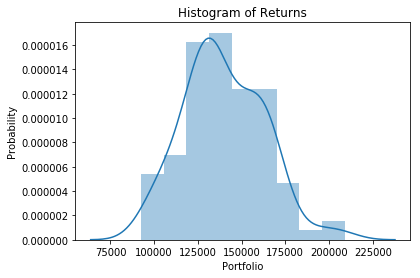

In [11]:
# For the first problem - minimize risk
simu = 100 
T = 300
m = 6
B = 100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[x1.value.item(0),x1.value.item(1),x1.value.item(2),x1.value.item(3),x1.value.item(4),x1.value.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

print("Mean of the portfolio:",np.mean(z_values))
print("Variance of the portfolio:",np.var(z_values))
sns.distplot(z_values)
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

Mean of the portfolio: 148529.7465847583
Variance of the portfolio: 724035116.1798569


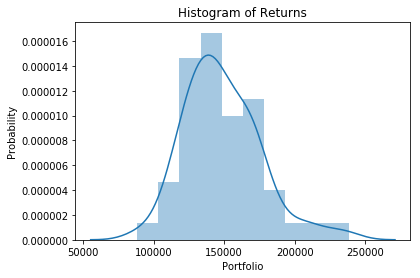

In [12]:
# For the second problem - maximize returns - with risk aversion coeffs = 0.1
simu = 100 
T = 300
m = 6
B = 100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[x2[0],x2[1],x2[2],x2[3],x2[4],x2[5]]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

print("Mean of the portfolio:",np.mean(z_values))
print("Variance of the portfolio:",np.var(z_values))
sns.distplot(z_values)
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

Mean of the portfolio: 144832.33857345907
Variance of the portfolio: 698230568.0980779


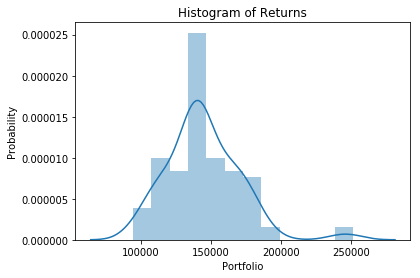

In [13]:
# For the second problem - maximize returns - with risk aversion coeffs = 0.15
simu = 100 
T = 300
m = 6
B = 100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[x3[0],x3[1],x3[2],x3[3],x3[4],x3[5]]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

print("Mean of the portfolio:",np.mean(z_values))
print("Variance of the portfolio:",np.var(z_values))
sns.distplot(z_values)
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

Mean of the portfolio: 144691.8814297715
Variance of the portfolio: 536847504.2638751


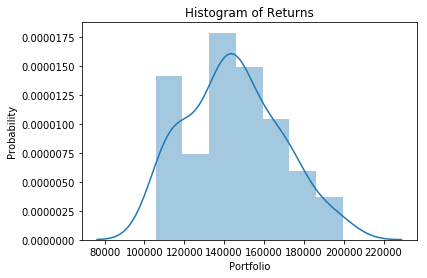

In [14]:
# For the second problem - maximize returns - with risk aversion coeffs = 0.2
simu = 100 
T = 300
m = 6
B = 100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[x4[0],x4[1],x4[2],x4[3],x4[4],x4[5]]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

print("Mean of the portfolio:",np.mean(z_values))
print("Variance of the portfolio:",np.var(z_values))
sns.distplot(z_values)
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

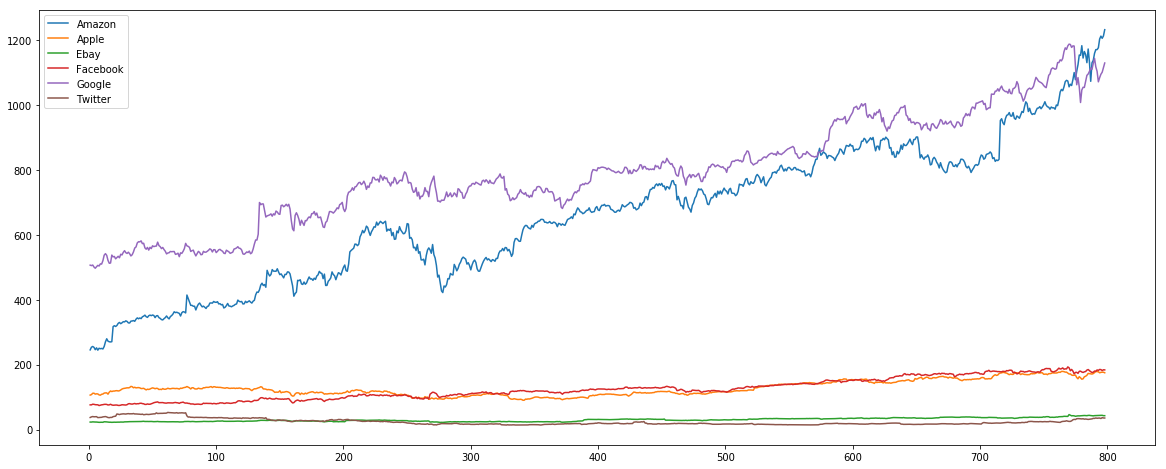

In [15]:
# plotting the stock over time
df.loc[1:,['Amazon','Apple','Ebay','Facebook','Google','Twitter']].plot(figsize=(20,8))

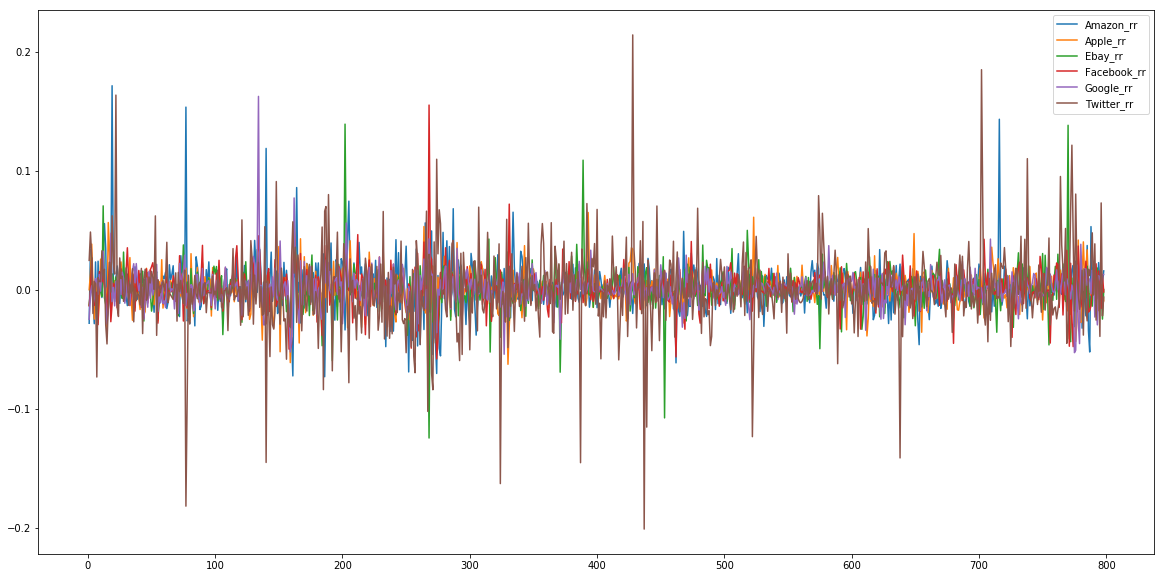

In [40]:
# plotting the stock daily returns over time
df.loc[1:,['Amazon_rr','Apple_rr','Ebay_rr','Facebook_rr','Google_rr','Twitter_rr']].plot(figsize=(20,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cf742b0>,
      dtype=object)

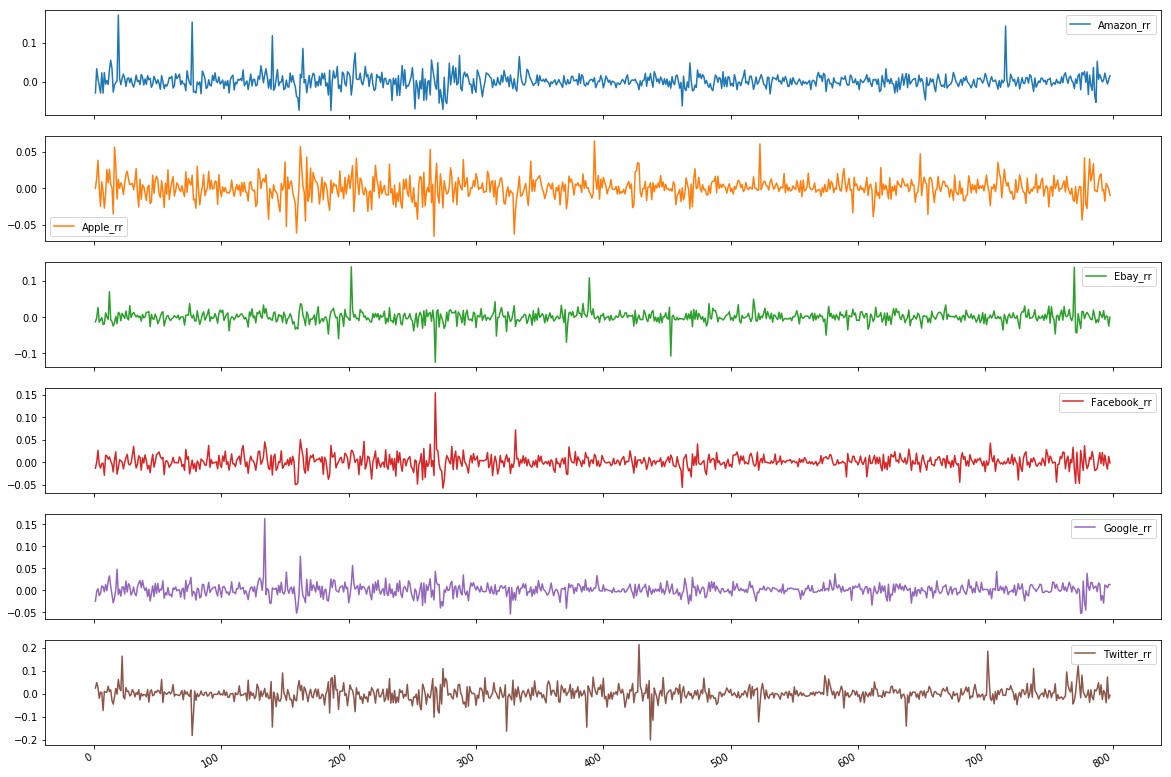

In [38]:
# plotting the stock daily returns over time
df.loc[1:,['Amazon_rr','Apple_rr','Ebay_rr','Facebook_rr','Google_rr','Twitter_rr']].plot(subplots=True, figsize=(20,15))

#### Recommendations

**Background**

Portfolio optimization is the process of selecting the best portfolio allocations for the given set of stocks according to some objective. The objective typically maximizes factors such as expected return, and minimizes costs like financial risk. Following are the building blocks of the two optimization problems -
* The **decision variable** is the portfolio allocation for each stock - x
* The **objective function** in the first problem is to minimize the risk function, and in the second problem is to maximize the returns/utility function
* The **constraints** are sum of all portfolio allocations should be 100% and non negativity for each allocation. For the first problem while minimizing risk, additional constraint is on minimum returns for a threshold

We look at 799 days of portfolio stock values and calculate the expected returns on the 800th day.

**Explain the different allocations, i.e., why they are different**

The expected returns from the 6 stocks -

| Amazon | Apple | Ebay | Facebook | Google | Twitter          
| :---:|:---: | :---:|:---:|:---: |:---:
| 0.199%|0.063%|0.075%|0.109%|0.097%|-0.003%

The allocations for each stock and expected returns from each scenario -

| Scenario | Amazon allocation | Apple allocation | Ebay allocation | Facebook allocation | Google allocation | Twitter allocation | Objective fn value      
| :---:|:---: | :---:|:---:|:---: |:---: |:---: |:---:
| Objective - Minimize risk|20.4%|19.5%|16.2%|17.4%|19.0%|7.5%|0.004%
| Objective - Maximize utility, risk aversion = 0.1|29.7%|15.5%|16.3%|19.7%|18.9%|0.0%|0.026%
| Objective - Maximize utility, risk aversion = 0.15|28.0%|16.3%|16.7%|19.5%|19.0%|0.5%|-0.022%
| Objective - Maximize utility, risk aversion = 0.2|25.9%|16.8%|16.9%|19.1%|18.8%|2.4%|-0.068%

The mean and variance from the simulations for each scenario (**Please note the simulation results will change slightly every time it's run again**) -

| Scenario | Portfolio Mean | Portfolio Variance 
| :---:|:---: | :---:
| Objective - Minimize risk| \$139,743 | \$515,788,280
| Objective - Maximize utility, risk aversion = 0.1| \$148,530 | \$724,035,116
| Objective - Maximize utility, risk aversion = 0.15| \$144,832 | \$698,230,568
| Objective - Maximize utility, risk aversion = 0.2| \$144,692 | \$536,847,504

The investment strategies are different for the two problems we are trying to solve above. In one of the problems, we focus on minimizing the downside risk and portfolio diversification seems to be the best option. However, the optimization problem for risk minimization doesn't distinguish between positive and negative returns and that is why still assigns ~8% to the Twitter portfolio whose expected returns are negative. But overall downside risk is minimized to a 0.004% level. In the second problem, objective is to maximize the expected returns penalizing it for volatility. Since, the returns are highest from the first stock, Amazon, that is why the allocation to that one is the highest (25-30%). As the risk aversion increases between 0.1 to 0.2, the allocations start changing - some part from amazon is distributed among the other stocks. 

**What should an investor with risk aversion 𝛾 = 0.1 do? What about investors with 𝛾 = 0.15 and 𝛾 = 0.2?**

As we know, when investors are risk averse, meaning that given two portfolios that offer the same expected return, investors will prefer the less risky one. Thus, an investor will take on increased risk only if compensated by higher expected returns. Conversely, an investor who wants higher expected returns must accept more risk. The exact trade-off will be the same for all investors, but different investors will evaluate the trade-off differently based on individual risk aversion characteristics. The implication is that a rational investor will not invest in a portfolio if a second portfolio exists with a more favorable risk-expected return profile – i.e., if for that level of risk an alternative portfolio exists that has better expected returns.

The difference between the allocations of the portfolio stocks among the three risk aversion choices is not very high, but we do see that the expected returns start decreasing with increase in the risk aversion factor. In fact for risk aversion=0.15 and 0.2, the expected returns are negative whereas for risk aversion factor=0.1, the returns are the highest even higher than the first problem where we minimize risk. This is intuitive as we are trying to maximize is the expected returns in the second problem. And that is why minimum% is allocated to twitter stocks as the returns are negative. So, an investor with risk 𝛾 = 0.1 should not invest in twitter at all and invest maximum in Amazon to get the highest returns. This portfolio is high return but also high risk given the high variances as evident from the mean-variances tabulated from the simulation results. For investors with 𝛾 = 0.15, the medium return-medium risk portfolio is suited so that at least some amount if invested in each stock even if it is negative returns. For investors with 𝛾 = 0.2, since they are more risk averse, the rate of diversification should be even higher and hence similar to investors who want to minimize risk they should look at low return-low risk portfolio and put their eggs in different baskets. However, the last two sets of investors should keep in mind that the overall expected returns are negative.

### Part B: Portfolio Optimization based on the last 400 trading days.

#### Preparing the data

In [41]:
# Read the data
df = (pd.read_excel("datahomework2.xls"))[399:].reset_index()
df.drop(['index'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
Amazon      400 non-null float64
Apple       400 non-null float64
Ebay        400 non-null float64
Facebook    400 non-null float64
Google      400 non-null float64
Twitter     400 non-null float64
dtypes: float64(6)
memory usage: 18.8 KB


In [18]:
df.head()

,Amazon,Apple,Ebay,Facebook,Google,Twitter
0,687.181,105.870003,31.059999,124.360001,797.250000,19.540001
1,676.851,107.480003,31.389999,125.150002,806.929993,20.860001
2,674.919,108.370003,31.150000,125.260002,805.229980,20.400000
3,685.267,108.809998,31.110001,125.059998,807.479980,20.170000
4,691.066,108.000000,31.120001,124.879997,808.489990,19.000000


**Based on the data set, compute the rate of returns for each stock**

In [42]:
# Calculating the return rates using shift to lag on observations
df['Amazon_rr'] = (df.Amazon-df.Amazon.shift(1))/df.Amazon.shift(1)
df['Apple_rr'] = (df.Apple-df.Apple.shift(1))/df.Apple.shift(1)
df['Ebay_rr'] = (df.Ebay-df.Ebay.shift(1))/df.Ebay.shift(1)
df['Facebook_rr'] = (df.Facebook-df.Facebook.shift(1))/df.Facebook.shift(1)
df['Google_rr'] = (df.Google-df.Google.shift(1))/df.Google.shift(1)
df['Twitter_rr'] = (df.Twitter-df.Twitter.shift(1))/df.Twitter.shift(1)
df.head()

,Amazon,Apple,Ebay,Facebook,Google,Twitter,Amazon_rr,Apple_rr,Ebay_rr,Facebook_rr,Google_rr,Twitter_rr
0,687.181,105.870003,31.059999,124.360001,797.250000,19.540001,NaN,NaN,NaN,NaN,NaN,NaN
1,676.851,107.480003,31.389999,125.150002,806.929993,20.860001,-0.015032,0.015207,0.010625,0.006353,0.012142,0.067554
2,674.919,108.370003,31.150000,125.260002,805.229980,20.400000,-0.002854,0.008281,-0.007646,0.000879,-0.002107,-0.022052
3,685.267,108.809998,31.110001,125.059998,807.479980,20.170000,0.015332,0.004060,-0.001284,-0.001597,0.002794,-0.011274
4,691.066,108.000000,31.120001,124.879997,808.489990,19.000000,0.008462,-0.007444,0.000321,-0.001439,0.001251,-0.058007


** Based on the data set, compute the average returns that will be used for the optimization **

In [20]:
# Using in-built geometric mean
mu = stats.gmean(1+df.loc[1:,['Amazon_rr','Apple_rr','Ebay_rr','Facebook_rr','Google_rr','Twitter_rr']])-1
mu

array([0.0014643 , 0.00126081, 0.00080563, 0.00098042, 0.0008732 ,
       0.00150318])

** Based on the data set, compute the variance-covariance matrix of the stock returns **

In [21]:
# Using in-built covariance
Cov = matrix((df.loc[1:,['Amazon_rr','Apple_rr','Ebay_rr','Facebook_rr','Google_rr','Twitter_rr']]).cov())
Cov

matrix([[ 2.30088874e-04, -9.80656083e-06, -3.67118033e-07,
         -2.03091049e-06, -9.31662594e-07, -3.37324041e-05],
        [-9.80656083e-06,  1.39717164e-04,  6.59845214e-06,
          2.84381359e-06,  6.91391549e-06, -1.06771505e-05],
        [-3.67118033e-07,  6.59845214e-06,  2.36747967e-04,
         -1.32110055e-05,  1.87955968e-06, -2.61970380e-05],
        [-2.03091049e-06,  2.84381359e-06, -1.32110055e-05,
          1.58565058e-04,  2.13809934e-05, -2.33631945e-06],
        [-9.31662594e-07,  6.91391549e-06,  1.87955968e-06,
          2.13809934e-05,  1.22494482e-04, -5.32303550e-06],
        [-3.37324041e-05, -1.06771505e-05, -2.61970380e-05,
         -2.33631945e-06, -5.32303550e-06,  1.00392215e-03]])

#### Portfolio Optimization: Minimizing Risk

Let the portfolio allocation be \begin{align} x = {x_{1},x_{2},x_{3},x_{4},x_{5},x_{6}} \end{align} 

The goal is solve the optimization problem to minimize risk of the portfolio with a constraint on the minimum returns.

\begin{align}
\text{Minimize} \quad \frac{1}{2} x^T & \Sigma x\\
\mu^T x &\geq R\\
\sum_{i=1}^6x_i&=1\\
x&\geq0
\end{align}

where R is the annual return that the investor wants to achieve, with 𝑅 = 0.07

In [22]:
R=0.07/401 # min returns since we have 400 days using T+1 = 401 like we used 800 for the full dataset with 799 rows
x5=cvx.Variable(6) # initialize the allocation vector

risk=0.5*quad_form(x5, Cov) # define risk
rr=sum_entries(mu*x5) # calculate returns matrix

# Solving the optimization problem
prob5 = Problem(Minimize(risk ), [rr>=R,sum_entries(x5) == 1, x5 >= 0])
prob5.solve()
print("The optimal allocation for each stock is\n",x5.value)
print("The objective function value is\n",prob5.value)

The optimal allocation for each stock is
 [[0.16299627]
 [0.22954001]
 [0.14733241]
 [0.18900488]
 [0.22479389]
 [0.04633254]]
The objective function value is
 1.65220909001026e-05


#### Portfolio Optimization: Maximizing Returns (or Utility)

Another approach to portfolio optimization is to optimize the expected returns that the portfolio would give while penalizing for volatility (variance). Let the portfolio allocation be 
\begin{align} x = {x_{1},x_{2},x_{3},x_{4},x_{5},x_{6}} \end{align} 
Find the optimal allocations for the optimization problem

\begin{align}
\text{Maximize} \quad \mu^T x - \gamma \sqrt{ x^T \Sigma x}\\
\sum_{i=1}^6x_i&=1\\
x&\geq0
\end{align}

Report the optimal allocations and value of the objective function for each risk aversion coefficient of the investor:- 
\begin{align} \gamma = 0.1 \\
\gamma = 0.15\\
\gamma = 0.2
\end{align}

In [23]:
import numpy as np
from scipy.optimize import minimize

# function to calculate expected returns, define risk and calculate utility
def util(x):
      return -(x.T * matrix(mu).T - g*np.sqrt(np.dot(np.dot(x.T,Cov),x))) 

# For risk aversion = 0.1
x6 = matrix([0,0,0,0,0,0]) # initialize the allocation vector
g = 0.1 # Specify risk aversion factor

# Solving the optimization problem
sol = minimize(util, x6,
               constraints=({'type':'eq','fun':lambda x:x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1}),
               bounds=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None)))

x6 = sol.x
print("The optimal allocation for each stock is\n",x6)
print("The objective function value is\n",-sol.fun)

The optimal allocation for each stock is
 [0.21998636 0.21232513 0.15322577 0.17908012 0.17333021 0.06205241]
The objective function value is
 0.0005466098691681839


In [24]:
# For risk aversion = 0.15
x7 = matrix([0,0,0,0,0,0]) # initialize the allocation vector
g = 0.15 # Specify risk aversion factor

# Solving the optimization problem
sol = minimize(util, x7,
               constraints=({'type':'eq','fun':lambda x:x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1}),
               bounds=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None)))

x7 = sol.x
print("The optimal allocation for each stock is\n",x7)
print("The objective function value is\n",-sol.fun)

The optimal allocation for each stock is
 [0.20717139 0.20630262 0.16345486 0.18306271 0.18090267 0.05910575]
The objective function value is
 0.000246216144140671


In [32]:
# For risk aversion = 0.2
x8 = matrix([0,0,0,0,0,0]) # initialize the allocation vector
g = 0.2 # Specify risk aversion factor

# Solving the optimization problem
sol = minimize(util, x8,
               constraints=({'type':'eq','fun':lambda x:x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1}),
               bounds=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None)))

x8 = sol.x
print("The optimal allocation for each stock is\n",x8)
print("The objective function value is\n",-sol.fun)

The optimal allocation for each stock is
 [0.20166682 0.20413569 0.16790651 0.18510503 0.184638   0.05654795]
The objective function value is
 -4.868379885095012e-05


#### Simulations

Based on the optimal allocations 𝑥∗ obtained in the two questions above, 𝜇 and 𝛴, please simulate the value of your portfolio after 300 trading days assuming that you have invested $100,000.
* Report the mean and the variance of the portfolio in a table
* Provide visualizations of your results.

Mean of the portfolio: 140072.03621854068
Variance of the portfolio: 187898146.36863258


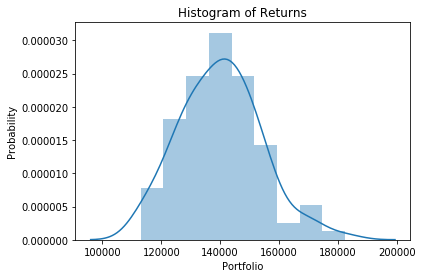

In [26]:
# For the first problem - minimize risk
simu = 100 
T = 300
m = 6
B = 100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[x5.value.item(0),x5.value.item(1),x5.value.item(2),x5.value.item(3),x5.value.item(4),x5.value.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

print("Mean of the portfolio:",np.mean(z_values))
print("Variance of the portfolio:",np.var(z_values))
sns.distplot(z_values)
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

Mean of the portfolio: 140726.2183902345
Variance of the portfolio: 255260040.54455402


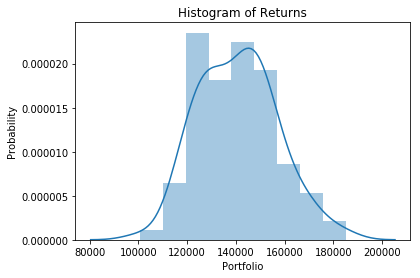

In [27]:
# For the second problem - maximize returns - with risk aversion coeffs = 0.1
simu = 100 
T = 300
m = 6
B = 100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[x6[0],x6[1],x6[2],x6[3],x6[4],x6[5]]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

print("Mean of the portfolio:",np.mean(z_values))
print("Variance of the portfolio:",np.var(z_values))
sns.distplot(z_values)
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

Mean of the portfolio: 139577.6825357785
Variance of the portfolio: 161210596.7112967


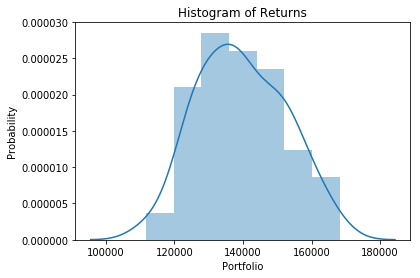

In [28]:
# For the second problem - maximize returns - with risk aversion coeffs = 0.15
simu = 100 
T = 300
m = 6
B = 100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[x7[0],x7[1],x7[2],x7[3],x7[4],x7[5]]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

print("Mean of the portfolio:",np.mean(z_values))
print("Variance of the portfolio:",np.var(z_values))
sns.distplot(z_values)
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

Mean of the portfolio: 137761.6793734083
Variance of the portfolio: 209565432.58165744


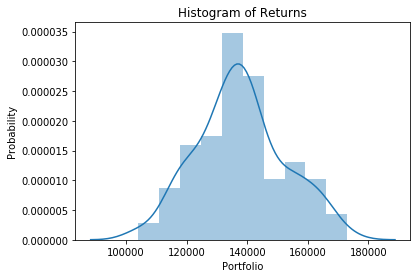

In [33]:
# For the second problem - maximize returns - with risk aversion coeffs = 0.2
simu = 100 
T = 300
m = 6
B = 100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[x8[0],x8[1],x8[2],x8[3],x8[4],x8[5]]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

print("Mean of the portfolio:",np.mean(z_values))
print("Variance of the portfolio:",np.var(z_values))
sns.distplot(z_values)
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

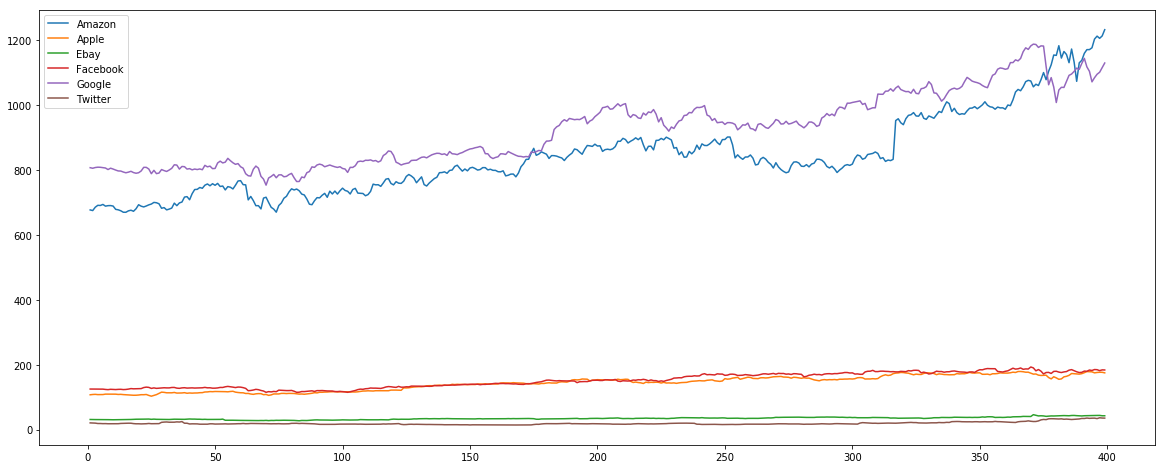

In [30]:
# plotting the stock over time
df.loc[1:,['Amazon','Apple','Ebay','Facebook','Google','Twitter']].plot(figsize=(20,8))

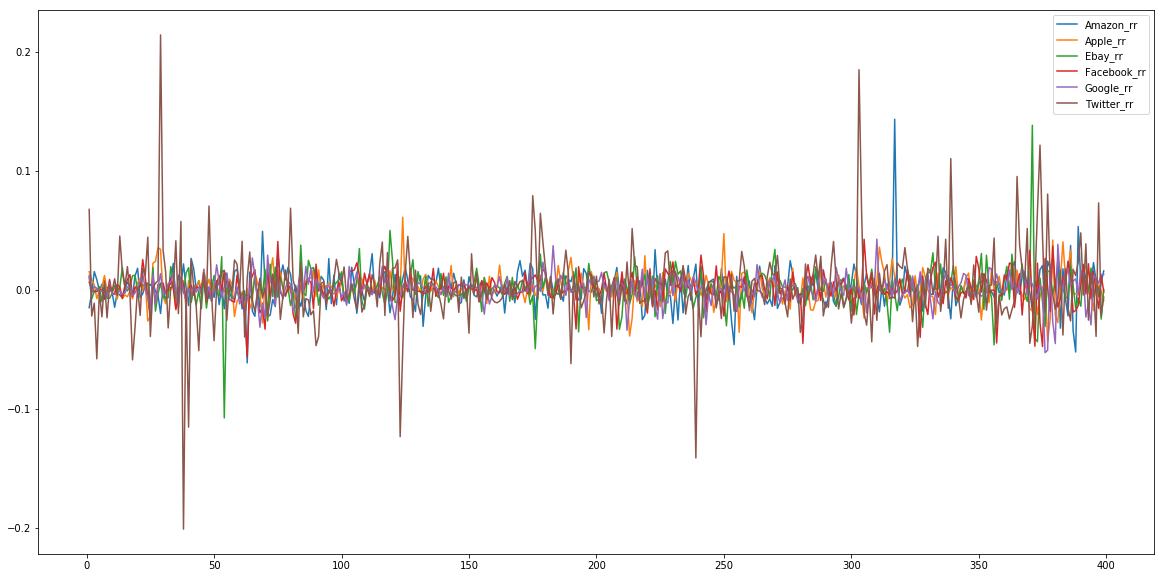

In [43]:
# plotting the stock returns over time
df.loc[1:,['Amazon_rr','Apple_rr','Ebay_rr','Facebook_rr','Google_rr','Twitter_rr']].plot(figsize=(20,10))

#### Recommendations

**Background**

Portfolio optimization is the process of selecting the best portfolio allocations for the given set of stocks according to some objective. The objective typically maximizes factors such as expected return, and minimizes costs like financial risk. Following are the building blocks of the two optimization problems -
* The **decision variable** is the portfolio allocation for each stock - x
* The **objective function** in the first problem is to minimize the risk function, and in the second problem is to maximize the returns/utility function
* The **constraints** are sum of all portfolio allocations should be 100% and non negativity for each allocation. For the first problem while minimizing risk, additional constraint is on minimum returns for a threshold

We look at the last 400 days of portfolio stock values and calculate the expected returns on the 800th day.

**Explain the different allocations, i.e., why they are different**

The expected returns from the 6 stocks -

| Amazon | Apple | Ebay | Facebook | Google | Twitter          
| :---:|:---: | :---:|:---:|:---: |:---:
| 0.146%|0.126%|0.081%|0.098%|0.087%|0.150%

The allocations for each stock and expected returns from each scenario -

| Scenario | Amazon allocation | Apple allocation | Ebay allocation | Facebook allocation | Google allocation | Twitter allocation | Objective fn value      
| :---:|:---: | :---:|:---:|:---: |:---: |:---: |:---:
    | Objective - Minimize risk|16.3%|23.0%|14.7%|18.9%|22.5%|4.6%|0.002%
| Objective - Maximize utility, risk aversion = 0.1|22.0%|21.2%|15.3%|17.9%|17.3%|6.2%|0.05%
| Objective - Maximize utility, risk aversion = 0.15|20.7%|20.6%|16.3%|18.3%|18.1%|5.9%|0.02%
| Objective - Maximize utility, risk aversion = 0.2|20.2%|20.4%|16.8%|18.5%|18.5%|5.7%|-0.005%

The mean and variance from the simulations for each scenario -

| Scenario | Portfolio Mean | Portfolio Variance 
| :---:|:---: | :---:
| Objective - Minimize risk| \$140,072 | \$187,898,146
| Objective - Maximize utility, risk aversion = 0.1| \$140,726 | \$255,260,041
| Objective - Maximize utility, risk aversion = 0.15| \$139,578 | \$161,210,597
| Objective - Maximize utility, risk aversion = 0.2| \$137,762 | \$209,565,433

The investment strategies are different for the two problems we are trying to solve above. In one of the problems, we focus on minimizing the downside risk and portfolio diversification seems to be the best option. Overall downside risk is minimized to a 0.002% level and maximum allocation is to Apple and Google since they seem to be less volatile. In the second problem, objective is to maximize the expected returns penalizing it for volatility. Since, the returns are high from the first two stocks, Amazon and Apple, that is why the total allocation to them is the highest (>40%). Even though Twitter's return rate is high, yet the overall dollar values are the lowest and hence it ends up with the least allocation. As the risk aversion increases between 0.1 to 0.2, the allocations start changing - Amazon, Apple and Twitter with high return rates allocations decrease and Ebay, facebook and Google allocations increase.

**What should an investor with risk aversion 𝛾 = 0.1 do? What about investors with 𝛾 = 0.15 and 𝛾 = 0.2?**

As we know, when investors are risk averse, meaning that given two portfolios that offer the same expected return, investors will prefer the less risky one. Thus, an investor will take on increased risk only if compensated by higher expected returns. Conversely, an investor who wants higher expected returns must accept more risk. The exact trade-off will be the same for all investors, but different investors will evaluate the trade-off differently based on individual risk aversion characteristics. The implication is that a rational investor will not invest in a portfolio if a second portfolio exists with a more favorable risk-expected return profile – i.e., if for that level of risk an alternative portfolio exists that has better expected returns.

The difference between the allocations of the portfolio stocks among the three risk aversion choices is not very high, but we do see that the expected returns start decreasing with increase in the risk aversion factor. In fact for risk aversion=0.2, the expected returns are negative whereas for risk aversion factor=0.1, the returns are the highest. This is intuitive as more emphasis is on returns than the risk for the latter. Investors with risk 𝛾 = 0.1 should invest maximum in Amazon given they want high returns followed by Apple. The least allocation is to Twitter and the rest are in the range of 15-17%. Investors with 𝛾 = 0.15 and 𝛾 = 0.2 should invest similar percentages in most of the stocks but being more risk averse, they should take out some allocations from Amazon, Apple and twitter and invest a little more in Ebay, Facebook and Google.

**Why are the allocations different?**

The allocations are different across Part 1 and Part 2 because the timeframe considered has a significant impact on the overall returns. From the mean-variance tabulation of the simulation results, we can clearly see that the stocks and overall portfolio have become less volatile (lower variance) in the last 400 days. The twitter returns change from negative to positive if we consider only the last 400 days. In fact, the expected returns from twitter are the highest among all six stocks. 